<a href="https://colab.research.google.com/github/Priyankamishra2098/tasks/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Author :  Priyanka Mishra**

**GRIP @ The Sparks Foundation**

**Data Science and Business Analytics Intern**

Batch : September 2023

**TASK 1** : Prediction using Supervised Machine Learning

Predicting the percentage of marks that a student is expected to score based upon the number of hours studied using linear regression


# **1. Importing Libraries and Dataset**

### Importing Libraries

In [5]:
# Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print("Libraries imported successfully!")

Libraries imported successfully!


### Loading the Dataset

In [6]:
# Reading the Data from link
url = "http://bit.ly/w-data"


### Reading of Dataset

In [7]:
students_df = pd.read_csv(url)
print("Dataset read successfully!")

Dataset read successfully!


### Dataset First View

In [8]:
students_df.head(3)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27


In [9]:
students_df.tail(3)

,Hours,Scores
22,3.8,35
23,6.9,76
24,7.8,86


# **2. Understanding the Variables**

### Dataset Information

In [10]:
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [11]:
students_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [12]:
students_df.shape

(25, 2)

### Null Values in the Dataset

In [13]:
# Missing values/Null values count
students_df.isna().sum()

Hours     0
Scores    0
dtype: int64

##3.**Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

### CHART 1 : Distribution of Data

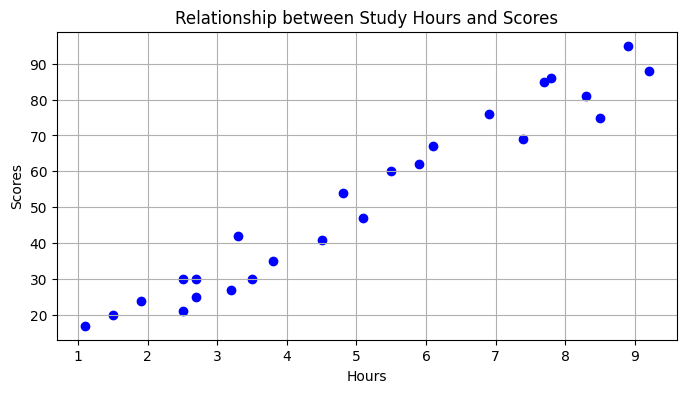

In [18]:
# Creating the scatter plot between Hours and Scores

plt.figure(figsize=(8, 4))
plt.scatter(students_df['Hours'], students_df['Scores'], color='blue', marker='o')
plt.title('Relationship between Study Hours and Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.grid(True)
plt.show()


### CHART 2 : Checking for Outliers

<Axes: >

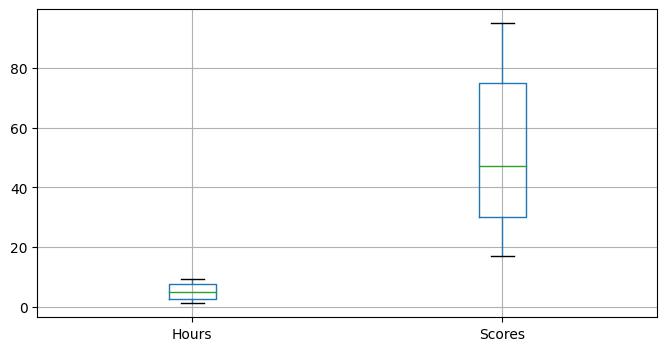

In [20]:
# Checking for Outliers using Boxplot

students_df.boxplot(figsize = (8,4))

## **3. Data Analysis and Model Fitting**

### Splitting Data into Training & Test Sets

In [21]:
x = students_df.iloc[:, :-1].values
y = students_df.iloc[:, 1].values

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

### Training Algorithm

In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

### Plotting the Regression Line

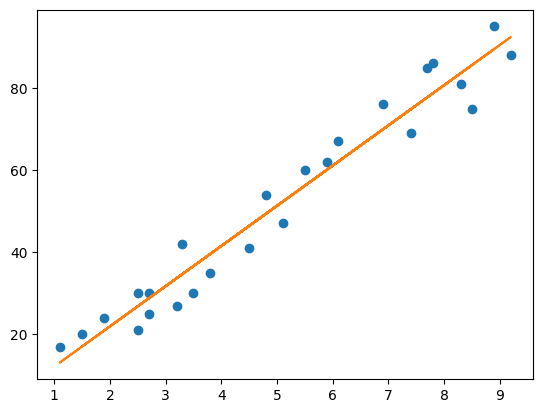

In [25]:
regression_line = model.coef_*x+model.intercept_

# Scatter Plot and Regression Line
plt.plot(x,y,'o')
plt.plot(x, regression_line);
plt.show()

##**4. Model Testing and Prediction of Scores**

In [26]:
# Testing Data - In Hours

print(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [27]:
# Predicting the Scores

y_predicted = model.predict(x_test)
print(y_predicted)

[17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]


In [29]:
# comparing the Actual vs Predicted Scores

df = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_predicted})
print("The actual scores vs the Predicted Scores : \n",df)

The actual scores vs the Predicted Scores : 
    Actual  Predicted
0      20  17.053665
1      27  33.694229
2      69  74.806209
3      30  26.842232
4      62  60.123359
5      35  39.567369
6      24  20.969092
7      86  78.721636


### Checking Model Accuracy

In [30]:
model_accuracy_score = model.score(x_train,y_train)
print("The model accuracy is : ",model_accuracy_score)

The model accuracy is :  0.9484997422695115


### Predicting Score of a student who studies for 9.25 Hours/Day

In [33]:
# Predicting with given value

Hours = [[9.25]]
self_prediction = model.predict(Hours)
print("The Predicted Score of student when the study hour is 9.25 Hours is :",self_prediction)

The Predicted Score of student when the study hour is 9.25 Hours is : [92.91505723]


## **Evaluating Model Performance**

In [34]:
# Calculating the Root Mean Squared Error

from sklearn import metrics
import math
MSE = metrics.mean_squared_error(y_test,y_predicted)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error :\n",RMSE)

Root Mean Square Error :
 4.7921912746363144


In [35]:
# Calculating the Mean Absolute Error

print("Mean Absolute Error:\n",metrics.mean_absolute_error(y_test, y_predicted))

Mean Absolute Error:
 4.419727808027651


In [39]:
# Calculating the Mean Squared Error

print("Mean Squared Error:\n",metrics.mean_squared_error(y_test, y_predicted))

Mean Squared Error:
 22.965097212700428


In [40]:
# Calculating R^2 Value

print('R^2:\n',metrics.r2_score(y_test,y_predicted))

R^2:
 0.9568211104435257


 **Value of  R^2 =  0.9568211104435257 suggests that this linear regression model is a good fit for the data, and it's capturing the underlying relationship effectively.**